In [1]:
using Logging
global_logger(ConsoleLogger())

## Load the code

include("Ratio_of_pseudo_gradient_and_gradient.jl");

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-06


In [2]:
## Load data for N=2

cd("Saved_Output_Files")

readdir()

9-element Vector{String}:
 ".DS_Store"
 "Output_PseudogradVsGradRatio_FR_c0_eq_1.01_μ_array_custom_Final.jld2"
 "Output_PseudogradVsGradRatio_FR_c0_eq_10.0_μ_array_custom_Final.jld2"
 "Output_PseudogradVsGradRatio_FR_c0_eq_2.0_μ_array_custom_Final.jld2"
 "Output_PseudogradVsGradRatio_FR_c0_eq_50.0_μ_array_custom_Final.jld2"
 "Output_PseudogradVsGradRatio_PRP_c0_eq_1.01_μ_array_custom_Final.jld2"
 "Output_PseudogradVsGradRatio_PRP_c0_eq_10.0_μ_array_custom_Final.jld2"
 "Output_PseudogradVsGradRatio_PRP_c0_eq_2.0_μ_array_custom_Final.jld2"
 "Output_PseudogradVsGradRatio_PRP_c0_eq_50.0_μ_array_custom_Final.jld2"

In [25]:
dict_output = load("Output_PseudogradVsGradRatio_PRP_c0_eq_1.01_μ_array_custom_Final.jld2")

Dict{String, Any} with 12 entries:
  "dict_Ft_NCG_PEP"                   => Dict{Any, Any}(0.3=>[2.54226, 0.558624…
  "dict_Ft_SDP"                       => Dict{Any, Any}(0.3=>[2.55916, 0.57552]…
  "array_c0_input"                    => [1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1…
  "dict_G_SDP"                        => Dict{Any, Any}(0.3=>[11.9903 4.55017 1…
  "dict_worst_case_functions"         => Dict{Any, Any}(0.3=>worst_case_functio…
  "array_PseduogradGradRatio_SDP"     => [3.025, 2.53125, 2.20417, 1.97232, 1.8…
  "dict_PseduogradGradRatio_NCG_PEP"  => Dict{Any, Any}(0.3=>1.40833, 0.325=>1.…
  "dict_PseduogradGradRatio_SDP"      => Dict{Any, Any}(0.3=>1.40833, 0.325=>1.…
  "array_PseduogradGradRatio_NCG_PEP" => [3.025, 2.53125, 2.20417, 1.97232, 1.8…
  "dict_γ"                            => Dict{Any, Any}(0.3=>2.14521, 0.325=>2.…
  "dict_β"                            => Dict{Any, Any}(0.3=>0.467559, 0.325=>0…
  "dict_G_NCG_PEP"                    => Dict{Any, Any}(0.3=>[11.3829 4.42

In [35]:
# For FR datasets, η = 0
# For PRP datasets, η = 1
# because this is PRP, we have 
η = 1; 
# Also from the dataset name we see that c_{k-1} = 1.01
c0 = 1.01

1.01

In [12]:
μ_array = LinRange(0.1, 0.8, 29);

array_PseduogradGradRatio_SDP = dict_output["array_PseduogradGradRatio_SDP"];

array_PseduogradGradRatio_NCG_PEP = dict_output["array_PseduogradGradRatio_NCG_PEP"];

## Theory predicted array for the ratio

L = 1;

if η == 1
   array_PseduogradGradRatio_theory = vec([(L+μ)^2/(4*μ*L) for μ in μ_array]);
elseif η == 0
	array_PseduogradGradRatio_theory = vec([((((L - μ)^2 + 4*c_0_input_initial*L*μ + 4*(L - μ)*sqrt((-1 + c_0_input_initial)*L*μ))/(4*L*μ))) for μ in μ_array]);
end

29-element Vector{Float64}:
 3.0250000000000004
 2.53125
 2.2041666666666666
 1.9723214285714288
 1.7999999999999998
 1.6673611111111113
 1.5625
 1.4778409090909088
 1.4083333333333334
 1.3504807692307692
 1.3017857142857143
 1.2604166666666667
 1.2249999999999999
 ⋮
 1.107440476190476
 1.0920454545454545
 1.0785326086956524
 1.0666666666666667
 1.05625
 1.0471153846153844
 1.0391203703703704
 1.032142857142857
 1.0260775862068965
 1.0208333333333333
 1.0163306451612901
 1.0125

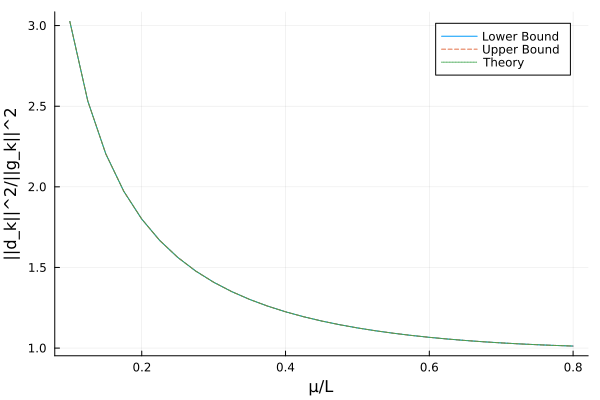

In [13]:
using Plots

plot()
plot(μ_array, [array_PseduogradGradRatio_SDP array_PseduogradGradRatio_NCG_PEP array_PseduogradGradRatio_theory], 
    label = ["Lower Bound" "Upper Bound" "Theory"], linestyle = [:solid :dash :dot])
xlabel!("μ/L")
ylabel!("||d_k||^2/||g_k||^2")        

In [14]:
dict_worst_case_functions = dict_output["dict_worst_case_functions"]

Dict{Any, Any} with 29 entries:
  0.3   => worst_case_function([0.0 3.4627 0.717701; 0.0 0.0 -1.02862; 0.0 0.0 …
  0.325 => worst_case_function([0.0 4.58506 0.580331; 0.0 0.0 -1.06076; 0.0 0.0…
  0.35  => worst_case_function([0.0 3.46728 0.679998; 0.0 0.0 -1.0246; 0.0 0.0 …
  0.375 => worst_case_function([0.0 3.48028 0.656083; 0.0 0.0 -1.02264; 0.0 0.0…
  0.45  => worst_case_function([0.0 3.56407 0.572439; 0.0 0.0 -1.01527; 0.0 0.0…
  0.25  => worst_case_function([0.0 3.48788 0.734996; 0.0 0.0 -1.0342; 0.0 0.0 …
  0.275 => worst_case_function([0.0 4.41444 0.640999; 0.0 0.0 -1.06336; 0.0 0.0…
  0.425 => worst_case_function([0.0 3.52391 0.596666; 0.0 0.0 -1.01628; 0.0 0.0…
  0.625 => worst_case_function([0.0 4.13029 0.411167; 0.0 0.0 -1.01627; 0.0 0.0…
  0.675 => worst_case_function([0.0 4.40511 0.364315; 0.0 0.0 -1.01535; 0.0 0.0…
  0.7   => worst_case_function([0.0 4.57519 0.348492; 0.0 0.0 -1.01886; 0.0 0.0…
  0.6   => worst_case_function([0.0 4.01432 0.433496; 0.0 0.0 -1.01603; 0.0 0

In [ ]:
## Let us construct the worst-case function for μ = 0.5

In [16]:
μ_input = 0.5

0.5

In [17]:
wf = dict_worst_case_functions[μ_input] # So this will be the bad function's {x_i, g_i, f_i}_{i} list for the (μ, N)

worst_case_function([0.0 3.6723662770028533 0.5254282117332534; 0.0 0.0 -1.0164999522255809; 0.0 0.0 0.034615456873347106; 0.0 0.0 0.0], [0.0 2.16558669943701 0.30673341022485867; 0.0 0.46908588897675446 -0.946045219913275; 0.0 0.0 0.10446557773516535; 0.0 0.0 0.0], [0.0, 4.19850072468186, 0.5526041565678838])

In [21]:
x_array = wf.x_array 
# first column of x_array = x_⋆, 
# second column of x_array = x_{k-1}
# third column of x_array = x_{k} and so on

4×3 OffsetArray(::Matrix{Float64}, 1:4, -1:1) with eltype Float64 with indices 1:4×-1:1:
 0.0  3.67237   0.525428
 0.0  0.0      -1.0165
 0.0  0.0       0.0346155
 0.0  0.0       0.0

In [22]:
g_array = wf.g_array
# first column of g_array = g_⋆, 
# second column of g_array = g_{k-1}
# third column of g_array = g_{k} and so on

4×3 OffsetArray(::Matrix{Float64}, 1:4, -1:1) with eltype Float64 with indices 1:4×-1:1:
 0.0  2.16559    0.306733
 0.0  0.469086  -0.946045
 0.0  0.0        0.104466
 0.0  0.0        0.0

In [23]:
f_array = wf.f_array
# first column of f_array = f_⋆, 
# second column of f_array = f_{k-1}
# third column of f_array = f_{k} and so on

3-element OffsetArray(::Vector{Float64}, -1:1) with eltype Float64 with indices -1:1:
 0.0
 4.19850072468186
 0.5526041565678838

In [27]:
dict_PseduogradGradRatio_NCG_PEP = dict_output["dict_PseduogradGradRatio_NCG_PEP"];

dict_γ = dict_output["dict_γ"];

dict_β = dict_output["dict_β"];

In [29]:
ratio = dict_PseduogradGradRatio_NCG_PEP[μ_input]

1.12500000062546

In [30]:
gamma = dict_γ[μ_input]

1.4851485148762182

In [31]:
beta = dict_β[μ_input]

0.15876766391979427

In [33]:
## The output of the following line is used for PEPit verification

In [37]:
println( "L = ", L)
println( "mu = ", μ_input)
println( "beta = ", beta)
println( "gamma = ", gamma)
println( "NCG_PEP_ratio = ", ratio)
println( "c0 = ", c0)
println( "eta = ", η)

L = 1
mu = 0.5
beta = 0.15876766391979427
gamma = 1.4851485148762182
NCG_PEP_ratio = 1.12500000062546
c0 = 1.01
eta = 1
